In [1]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('SampleSuperstore.csv')

In [12]:
df.shape

(9994, 13)

In [13]:


df.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:


df.describe()



,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
df['Country'].unique()

array(['United States'], dtype=object)

In [17]:
df = df.drop(['Country'], axis = 1)

In [18]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:


df.nunique()



Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

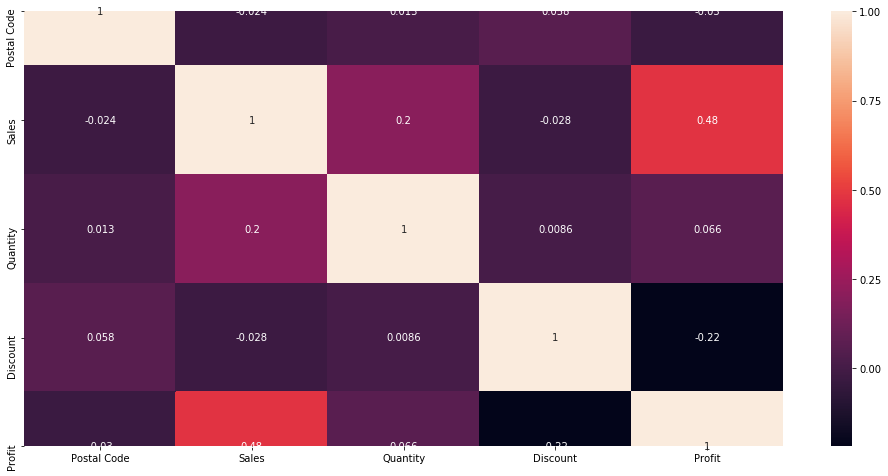

In [20]:
#checking for correlation
plt.figure(1, figsize = (17, 8))
cor = sns.heatmap(df.corr(), annot = True)

In [21]:
top_cities= df['City'].value_counts().nlargest(10)
top_cities

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

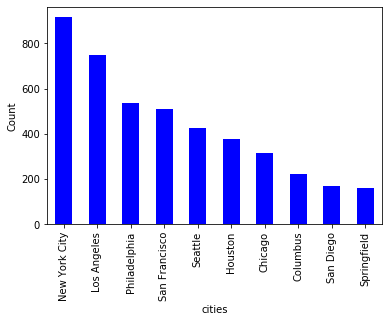

In [22]:
top_cities.plot(kind='bar', color='blue')
plt.ylabel('Count')
plt.xlabel('cities')
plt.show()

In [23]:
top_states= df['State'].value_counts().nlargest(10)
top_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

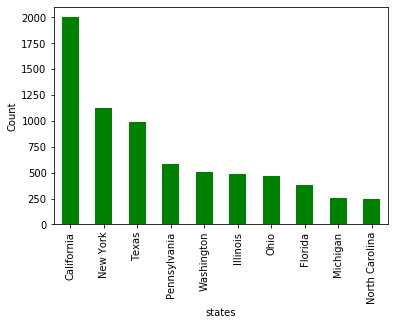

In [25]:
top_states.plot(kind='bar', color='green')
plt.ylabel('Count')
plt.xlabel('states')
plt.show()

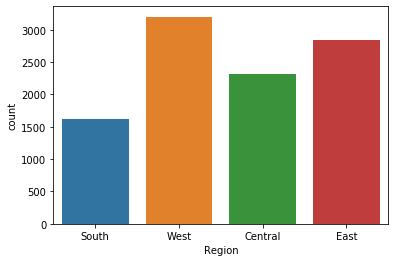

In [26]:
sns.countplot(x='Region',data=df)

In [27]:
category=df['Category'].unique()
print(category)

['Furniture' 'Office Supplies' 'Technology']


In [28]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

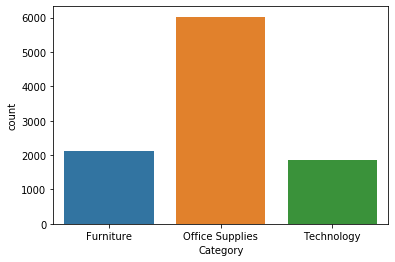

In [29]:
sns.countplot(x='Category',data=df)

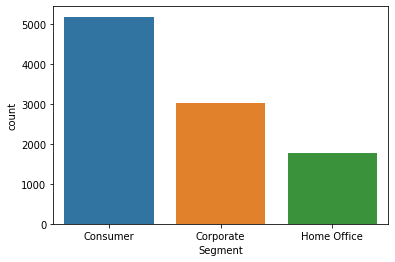

In [30]:
sns.countplot(x='Segment' ,data = df)

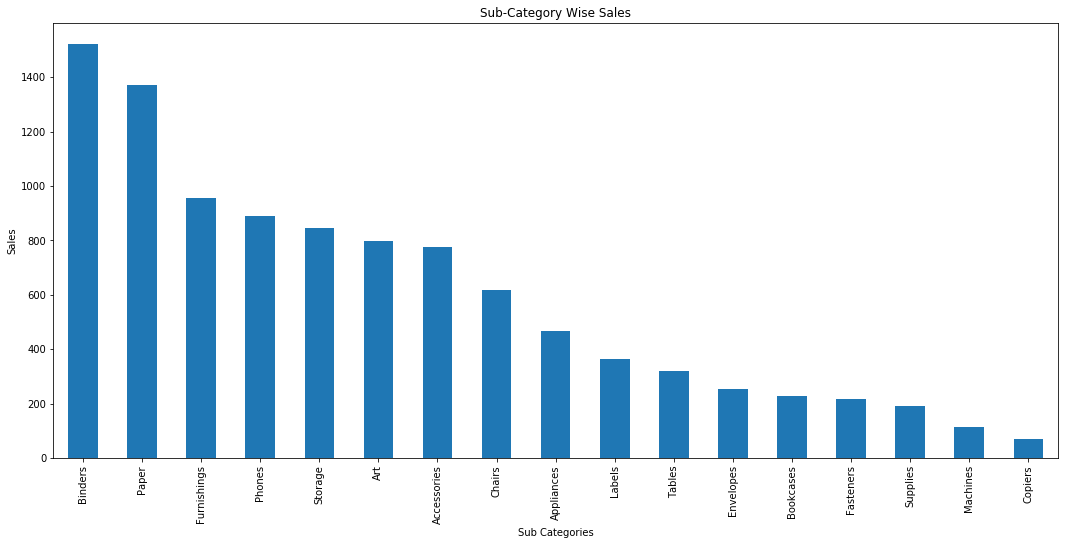

In [31]:
plt.figure(figsize=(18,8))
df['Sub-Category'].value_counts().plot.bar()
plt.title('Sub-Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Sub Categories')
plt.show()

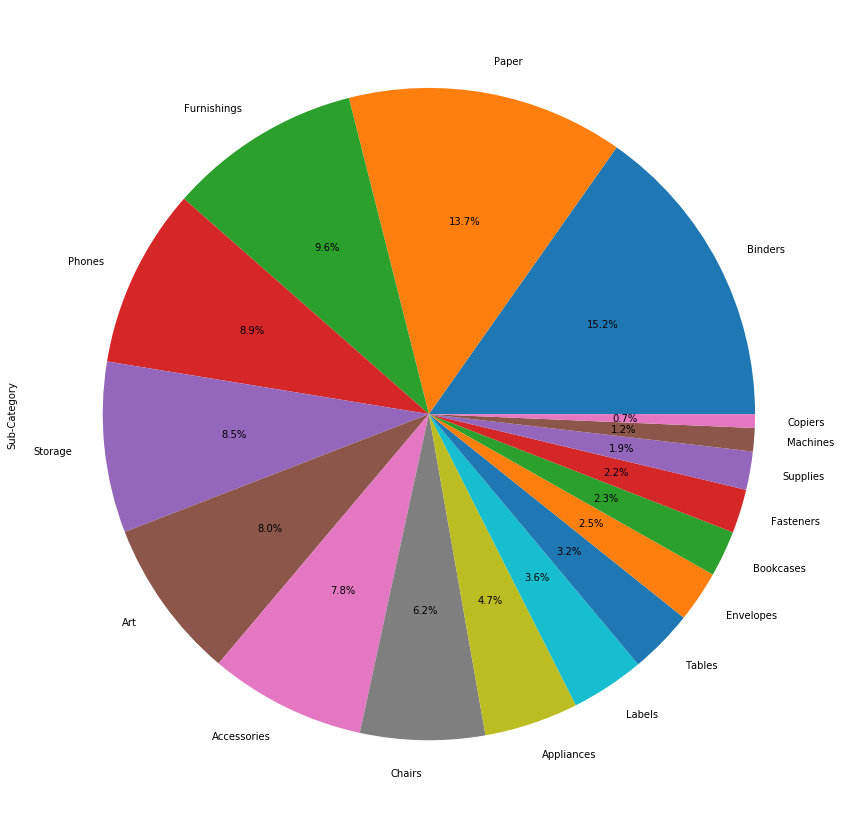

In [32]:
plt.figure(figsize=(15,15))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

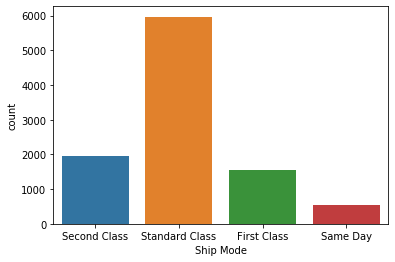

In [33]:
sns.countplot(x='Ship Mode' ,data = df)

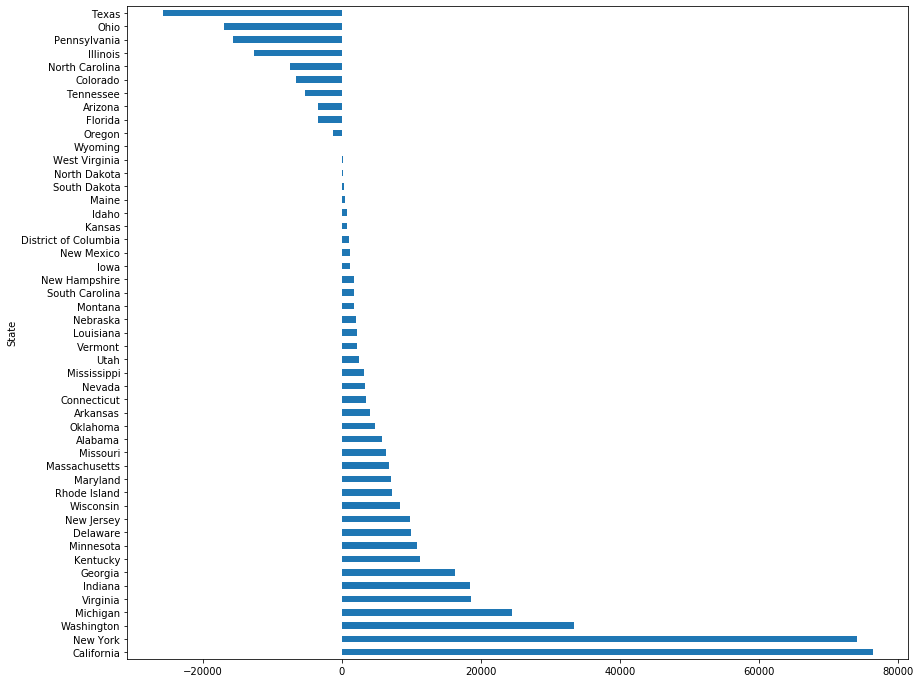

In [34]:
plt.figure(figsize=(14,12))
statewise=df.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

<Figure size 1080x720 with 0 Axes>

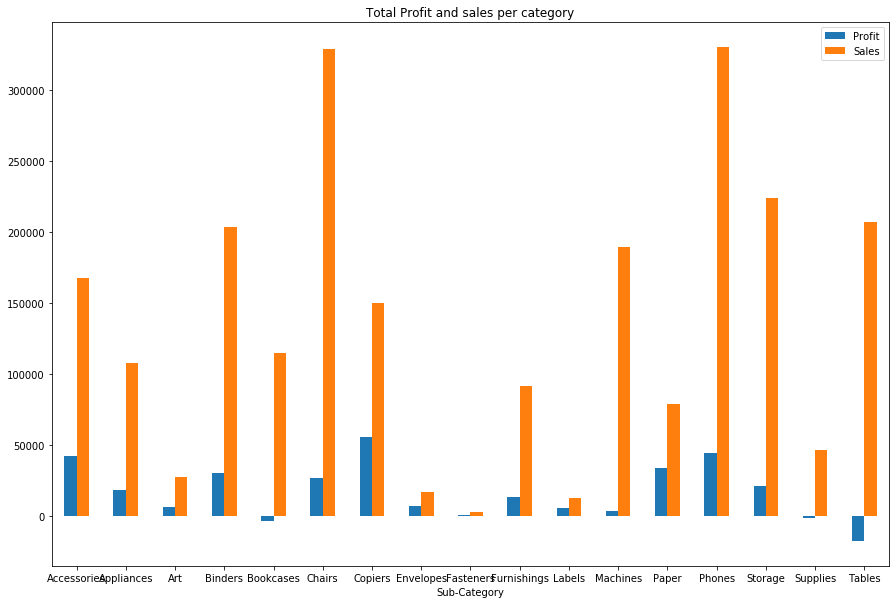

In [35]:
plt.figure(figsize=(15,10))
s=df.groupby('Sub-Category')['Profit','Sales'].sum()
s.plot.bar( rot=0,title="Total Profit and sales per category",figsize=(15,10));
plt.show(block=True)

Text(0.5, 1.0, 'sales per category')

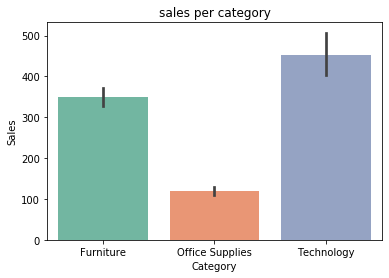

In [36]:
sns.barplot(x='Category',y='Sales',data=df,palette="Set2")
plt.title("sales per category")